# Determining the exponent of power-law distributions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model

We are interested in finding the distribution function $f_Z(z)$ for a given distribution. The distribution we will be looking at is a large sample of uniform numbers to a given power. Below we draw our sample, $z$.

In [2]:
alpha = 1

z = np.sort(np.random.rand(int(1e6)) ** (-(alpha + 1)))

We sort $z$ in order to get a smooth cumulative distribution function, which we'll find by
\begin{align}
    P(Z > z) = N \sum_{i = 1}^{n} z_i,
\end{align}
where $z_i$ is the element in $z$ at position $i$ and $N$ is a normalization factor. We normalize by dividing by the largest number in the cumulative sum, i.e., the last number.

In [3]:
def compute_cdf(z):
    z_sum = np.cumsum(z)
    z_norm = np.max(z_sum)

    return z_sum / z_norm

In [4]:
cdf_z = compute_cdf(z)

print(f"Area under the cdf-curve: {np.trapz(cdf_z)}")

Area under the cdf-curve: 1.3403289344258509


We plot the cumulative distribution function in a log-log plot in order to see the power-law type behaviour.

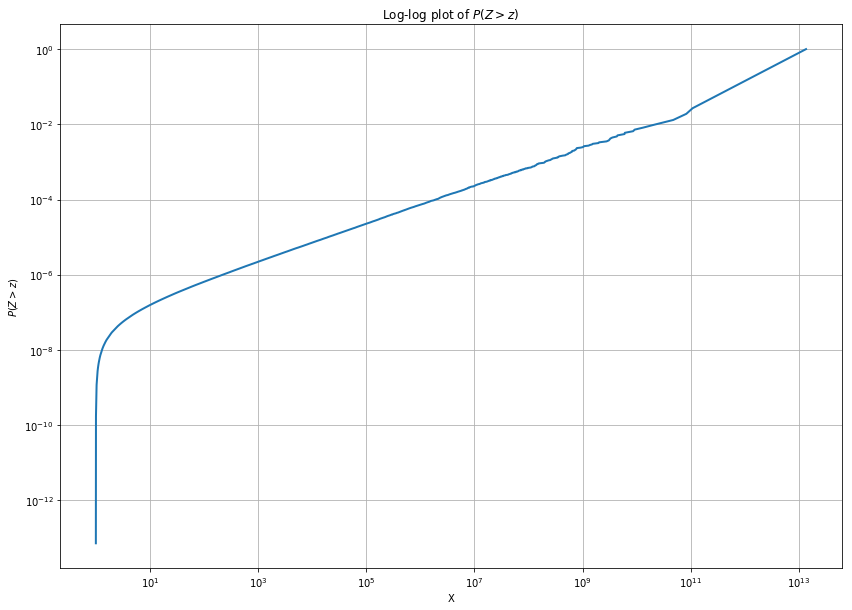

In [5]:
fig = plt.figure(figsize=(14, 10))

plt.loglog(z, cdf_z, lw=2)
plt.title(r"Log-log plot of $P(Z > z)$")
plt.xlabel(r"X")
plt.ylabel(r"$P(Z > z)$")
plt.grid()
plt.show()

In this plot we see a log-log plot of the cumulative distribution function for power-law random numbers
\begin{align}
    z(x) = x^{-(\alpha + 1)}.
\end{align}
Having found the cumulative distribution function, we can compute the actual underlying distribution function, $f_Z(z)$, from the cumulative distribution function by
\begin{align}
    f_Z(z) = \frac{\text{d} P(Z > z)}{\text{d} z}.
\end{align}
As the cumulative distribution function is given as an array, we use `np.gradient` to compute the derivative with respect to $z$.

In [6]:
f_z = np.gradient(cdf_z)

print(f"Area under the pdf-curve: {np.trapz(f_z)}")

Area under the pdf-curve: 0.9999999999999278


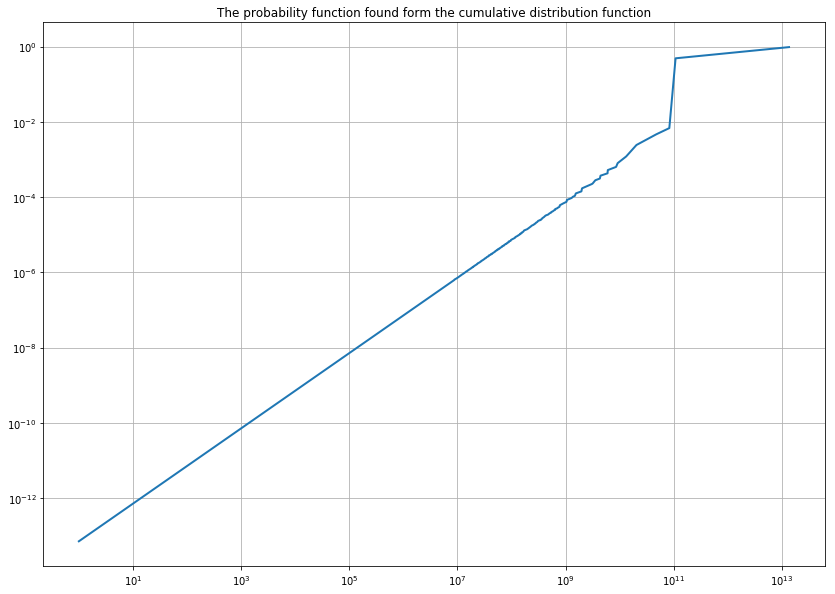

In [7]:
fig = plt.figure(figsize=(14, 10))

plt.loglog(z, f_z, lw=2)
plt.grid()
plt.title(r"The probability function found form the cumulative distribution function")
plt.xlabel(r"")
plt.show()

We have again used a log-log plot, but this time for the probability density function found from the cumulative distribution function.